In [59]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline
import seaborn as sns

In [2]:
# Load data: number of houses sold by zip code
sale_counts = pd.read_csv("Sale_Counts_Zip.csv")
sale_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31447 entries, 0 to 31446
Columns: 147 entries, RegionID to seasAdj
dtypes: float64(140), int64(6), object(1)
memory usage: 35.3+ MB


In [4]:
sale_counts.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,seasAdj
0,61639,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,57.0,36.0,68.0,80.0,66.0,61.0,53.0,50.0,61.0,0
1,84654,60657,Illinois,2,134.0,172.0,143.0,184.0,229.0,162.0,...,157.0,192.0,156.0,189.0,144.0,124.0,111.0,82.0,119.0,0
2,61637,10023,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,60.0,82.0,75.0,83.0,89.0,87.0,84.0,65.0,0
3,91982,77494,Texas,4,61.0,77.0,85.0,100.0,121.0,95.0,...,280.0,302.0,287.0,318.0,251.0,189.0,198.0,179.0,NaN,0
4,84616,60614,Illinois,5,NaN,NaN,NaN,NaN,NaN,NaN,...,177.0,208.0,216.0,200.0,194.0,164.0,121.0,87.0,120.0,0


In [8]:
sale_counts[sale_counts["RegionName"] == 10583].head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,seasAdj
2272,61876,10583,New York,2273,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,45.0,47.0,68.0,62.0,50.0,35.0,34.0,26.0,0


In [90]:
sales = sale_counts.copy()
sales.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,seasAdj
0,61639,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,57.0,36.0,68.0,80.0,66.0,61.0,53.0,50.0,61.0,0
1,84654,60657,Illinois,2,134.0,172.0,143.0,184.0,229.0,162.0,...,157.0,192.0,156.0,189.0,144.0,124.0,111.0,82.0,119.0,0
2,61637,10023,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,60.0,82.0,75.0,83.0,89.0,87.0,84.0,65.0,0
3,91982,77494,Texas,4,61.0,77.0,85.0,100.0,121.0,95.0,...,280.0,302.0,287.0,318.0,251.0,189.0,198.0,179.0,NaN,0
4,84616,60614,Illinois,5,NaN,NaN,NaN,NaN,NaN,NaN,...,177.0,208.0,216.0,200.0,194.0,164.0,121.0,87.0,120.0,0


In [91]:
sales.set_index("RegionName", inplace=True)
sales.head()

,RegionID,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,seasAdj
RegionName,,,,,,,,,,,,,,,,,,,,,
10025,61639,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.0,36.0,68.0,80.0,66.0,61.0,53.0,50.0,61.0,0
60657,84654,Illinois,2,134.0,172.0,143.0,184.0,229.0,162.0,166.0,...,157.0,192.0,156.0,189.0,144.0,124.0,111.0,82.0,119.0,0
10023,61637,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,60.0,82.0,75.0,83.0,89.0,87.0,84.0,65.0,0
77494,91982,Texas,4,61.0,77.0,85.0,100.0,121.0,95.0,71.0,...,280.0,302.0,287.0,318.0,251.0,189.0,198.0,179.0,NaN,0
60614,84616,Illinois,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177.0,208.0,216.0,200.0,194.0,164.0,121.0,87.0,120.0,0


In [92]:
sales.drop(["RegionID", "StateName", "SizeRank", "seasAdj"], axis=1, inplace=True)

In [93]:
sales.head()

,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
RegionName,,,,,,,,,,,,,,,,,,,,,
10025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.0,57.0,36.0,68.0,80.0,66.0,61.0,53.0,50.0,61.0
60657,134.0,172.0,143.0,184.0,229.0,162.0,166.0,126.0,84.0,69.0,...,109.0,157.0,192.0,156.0,189.0,144.0,124.0,111.0,82.0,119.0
10023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,40.0,60.0,82.0,75.0,83.0,89.0,87.0,84.0,65.0
77494,61.0,77.0,85.0,100.0,121.0,95.0,71.0,75.0,58.0,49.0,...,240.0,280.0,302.0,287.0,318.0,251.0,189.0,198.0,179.0,NaN
60614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,149.0,177.0,208.0,216.0,200.0,194.0,164.0,121.0,87.0,120.0


In [94]:
sales = sales.loc[10583]

In [95]:
sales = sales.dropna()

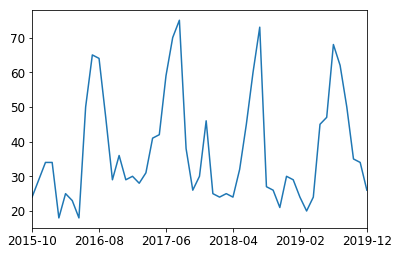

In [96]:
sales.plot()

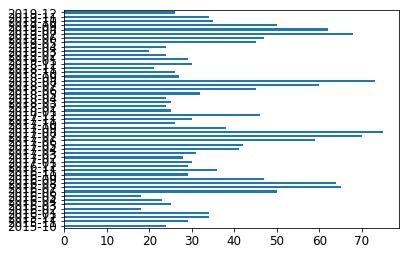

In [97]:
sales.plot.barh()

In [98]:
sales.head()

2015-10    24.0
2015-11    29.0
2015-12    34.0
2016-01    34.0
2016-02    18.0
Name: 10583, dtype: float64

In [99]:
sales = sales.reset_index()

In [100]:
sales.head()

,index,10583
0,2015-10,24.0
1,2015-11,29.0
2,2015-12,34.0
3,2016-01,34.0
4,2016-02,18.0


In [101]:
sales.rename(columns= {'index': 'date'}, inplace=True)
sales.head()

,date,10583
0,2015-10,24.0
1,2015-11,29.0
2,2015-12,34.0
3,2016-01,34.0
4,2016-02,18.0


In [102]:
sales.tail()

,date,10583
46,2019-08,62.0
47,2019-09,50.0
48,2019-10,35.0
49,2019-11,34.0
50,2019-12,26.0


In [105]:
from datetime import datetime

sales["date"] = pd.to_datetime(sales["date"])
sales.head()

,date,10583
0,2015-10-01,24.0
1,2015-11-01,29.0
2,2015-12-01,34.0
3,2016-01-01,34.0
4,2016-02-01,18.0


In [107]:
sales.tail()

,date,10583
46,2019-08-01,62.0
47,2019-09-01,50.0
48,2019-10-01,35.0
49,2019-11-01,34.0
50,2019-12-01,26.0


In [110]:
print(min(sales["date"]), max(sales["date"]))

2015-10-01 00:00:00 2019-12-01 00:00:00


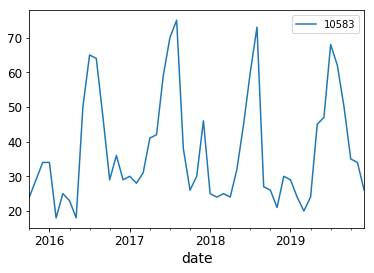

In [114]:
sales.set_index("date", inplace=True)
sales.plot()

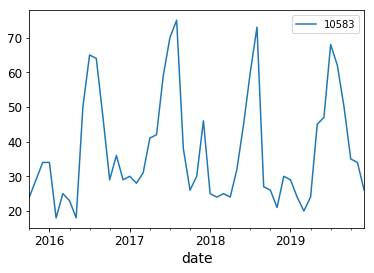

In [119]:
sales.plot()

In [120]:
sales.head()

,10583
date,
2015-10-01,24.0
2015-11-01,29.0
2015-12-01,34.0
2016-01-01,34.0
2016-02-01,18.0


In [126]:
sales[10583].to_numpy()

array([24., 29., 34., 34., 18., 25., 23., 18., 50., 65., 64., 47., 29.,
       36., 29., 30., 28., 31., 41., 42., 59., 70., 75., 38., 26., 30.,
       46., 25., 24., 25., 24., 32., 45., 60., 73., 27., 26., 21., 30.,
       29., 24., 20., 24., 45., 47., 68., 62., 50., 35., 34., 26.])

In [128]:
sales[10583].to_numpy()

array([24., 29., 34., 34., 18., 25., 23., 18., 50., 65., 64., 47., 29.,
       36., 29., 30., 28., 31., 41., 42., 59., 70., 75., 38., 26., 30.,
       46., 25., 24., 25., 24., 32., 45., 60., 73., 27., 26., 21., 30.,
       29., 24., 20., 24., 45., 47., 68., 62., 50., 35., 34., 26.])

In [135]:
s=np.full(9, np.nan)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [139]:
sales = np.concatenate([s, sales[10583].to_numpy()])

In [144]:
sales = sales.reshape((5,12))

In [145]:
sales

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, 24., 29., 34.],
       [34., 18., 25., 23., 18., 50., 65., 64., 47., 29., 36., 29.],
       [30., 28., 31., 41., 42., 59., 70., 75., 38., 26., 30., 46.],
       [25., 24., 25., 24., 32., 45., 60., 73., 27., 26., 21., 30.],
       [29., 24., 20., 24., 45., 47., 68., 62., 50., 35., 34., 26.]])

In [150]:
avgsales=np.nanmean(sales, axis=0)

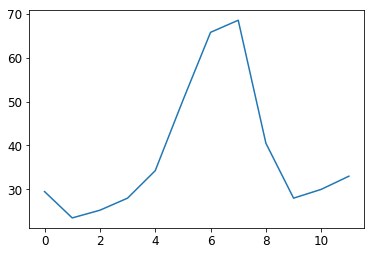

In [156]:
plt.plot(avgsales)

In [168]:
avgsales = pd.Series(avgsales, 
                     index=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

In [169]:
avgsales

Jan    29.50
Feb    23.50
Mar    25.25
Apr    28.00
May    34.25
Jun    50.25
Jul    65.75
Aug    68.50
Sep    40.50
Oct    28.00
Nov    30.00
Dec    33.00
Name: dfd, dtype: float64

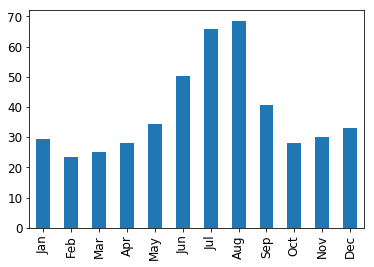

In [170]:
avgsales.plot.bar()

In [171]:
daysonz = pd.read_csv("DaysOnZillow_City.csv")
daysonz.head()

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,1,6181,New York,City,NY,204.0,188.0,214.0,212.0,210.0,...,171.0,178.0,182.0,174.0,158.0,154.0,156.0,164.0,171.0,180.0
1,2,12447,Los Angeles,City,CA,121.0,138.0,131.0,114.0,86.5,...,91.0,71.0,64.0,61.0,62.0,64.0,66.5,69.0,71.0,69.0
2,3,39051,Houston,City,TX,134.0,137.0,132.0,113.0,92.0,...,92.0,83.0,74.0,71.0,70.0,67.0,71.0,82.0,86.0,93.0
3,4,17426,Chicago,City,IL,186.0,184.0,191.0,189.0,176.0,...,135.0,133.0,75.0,70.0,77.0,85.0,90.0,98.0,105.0,99.0
4,5,6915,San Antonio,City,TX,101.0,110.0,120.5,110.0,104.0,...,82.0,68.0,62.0,61.0,61.0,60.0,62.0,70.0,76.0,78.0


In [177]:
daysonz[daysonz["RegionName"]=="Scarsdale"]

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
1293,1286,54333,Scarsdale,City,NY,NaN,NaN,NaN,NaN,NaN,...,161.0,191.0,146.0,148.0,122.0,140.0,122.0,172.0,149.0,178.0


In [583]:
def make_time_series(data, regionname, dropcols):
    r = data[data["RegionName"]==regionname]
    r.drop(dropcols, axis=1, inplace=True)
    #firstvalue = np.where(r.isnull().to_numpy())[1][-1]+1 # find the first nonnan value
    #firstyear = pd.to_datetime(r.columns[firstvalue]).year # find year of first nonnan value
    #r = r.melt(var_name="date", value_name="value") # pivot, keeping nans
    r = r.stack()
    r = r.droplevel(level=0)
    r.index = pd.to_datetime(r.index)
    #r["date"] = pd.to_datetime(r["date"]) # make date column type datetime
    #r = r[r["date"] > pd.to_datetime(str(firstyear)+"-01")] # reduce df to dates >= jan of firstyear
    #r = r.set_index("date")
    return r

def make_year_average(timeseries):
    ts = timeseries.copy()
    ts.index = ts.index.month # extract months from datetime indices for grouping
    mean_series = ts.groupby("date").mean() # is automatically sorted from 1 (jan) to 12(dec)
    return mean_series
    

In [584]:
# for days on zillow

dropcols = ["RegionName", "RegionID", "StateName", "SizeRank", "RegionType", "StateName"]

doz = make_time_series(daysonz, "Scarsdale", dropcols)
doz_yearavg = make_year_average(doz)

doz_yearavg.plot.bar()

KeyError: 'date'

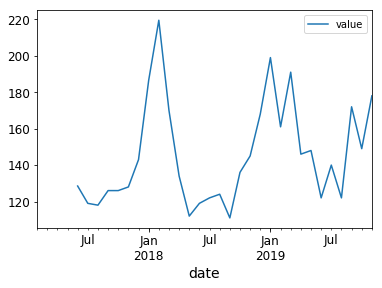

In [517]:
doz.plot()

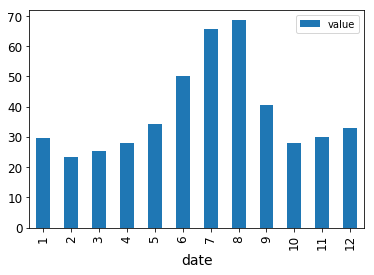

In [525]:
# for # houses sold

dropcols = ["RegionName", "RegionID", "StateName", "SizeRank", "seasAdj"]

num_houses = make_time_series(sale_counts, 10583, dropcols)
num_houses_yearavg = make_year_average(num_houses)

num_houses_yearavg.plot.bar()

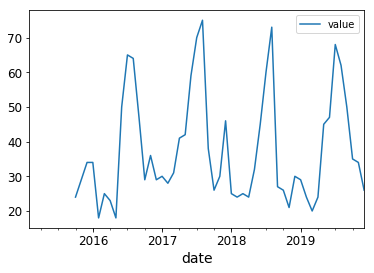

In [526]:
num_houses.plot()

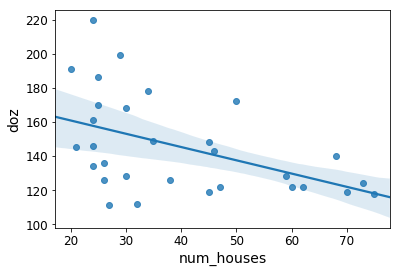

In [547]:
df = pd.concat([num_houses.rename(columns={"value": "num_houses"}), 
                doz.rename(columns={"value": "doz"})], 
               axis=1, join="inner")
sns.regplot('num_houses', 'doz', data=df)

In [554]:
# for median list price

med_price = pd.read_csv("Zip_MedianListingPrice_AllHomes.csv", encoding = "ISO-8859-1")
med_price.head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,795000.0,775000.0,799000.0,744500.0,...,1270000.0,1224500.0,1195000.0,1195000.0,1195000.0,1199000.0,1195000.0,1195000.0,1195000.0,1195000.0
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,389900.0,381900.0,369900.0,375000.0,...,449000.0,454900.0,469450.0,469000.0,466250.0,472450.0,459999.0,450000.0,450000.0,450000.0
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,NaN,NaN,NaN,NaN,...,1695000.0,1700000.0,1788000.0,1750000.0,1725000.0,1765000.0,1825000.0,1800000.0,1835000.0,1885000.0
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,287500.0,286808.0,290990.0,289900.0,...,350000.0,355924.0,355000.0,359990.0,359900.0,365000.0,365000.0,359900.0,356000.0,359000.0
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,489000.0,474000.0,459900.0,449500.0,...,652500.0,635000.0,622200.0,609950.0,599000.0,599000.0,625000.0,649900.0,649000.0,649000.0


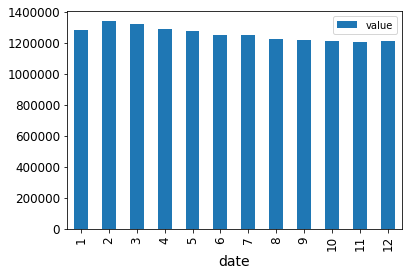

In [558]:
dropcols = ["RegionName", "City", "State", "Metro", "CountyName", "SizeRank"]

list_price = make_time_series(med_price, 10583, dropcols)
list_price_yearavg = make_year_average(list_price)

list_price_yearavg.plot.bar()

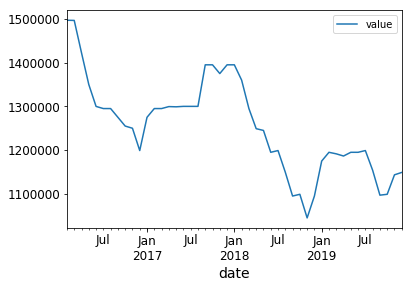

In [559]:
list_price.plot()

In [560]:
list_price

,value
date,
2016-02-01,1496900.0
2016-03-01,1496500.0
2016-04-01,1422495.0
2016-05-01,1350000.0
2016-06-01,1299900.0
2016-07-01,1295000.0
2016-08-01,1295000.0
2016-09-01,1275000.0
2016-10-01,1255000.0
